# <center>Feature Engineering - Concrete Comprehensive Strength</center>
### Abstract
Compressive strength or compression strength is the capacity of a material or structure to withstand loads tending to reduce size, as opposed to tensile strength, which withstands loads tending to elongate. It is one of the most important engineering properties of concrete. It is a standard industrial practice that the concrete is classified based on grades and this grade is nothing but the **Compressive Strength** of the concrete cube or cylinder. Cube or Cylinder samples are usually tested under a compression testing machine to obtain the compressive strength of concrete.

Concrete is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and ingredients. These ingredients include cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate, and fine aggregate.

### Data Characteristics    
The actual concrete compressive strength (MPa) for a given mixture under a specific age (days) was determined from laboratory. Data is in raw form (not scaled).

**Summary Statistics:**<br/>
Number of instances (observations): 1030<br/>
Number of Attributes: 9<br/>
Attribute breakdown: 8 quantitative input variables, and 1 quantitative output variable
### Attribute Information
- **Cement** - kg in a cubic meter($m^3$) mixture
- **Blast Furnace Slag** - kg in a cubic meter($m^3$) mixture
- **Fly Ash** - kg in a cubic meter($m^3$) mixture
- **Water** - kg in a cubic meter($m^3$) mixture
- **Superplasticizer** - kg in a cubic meter($m^3$) mixture
- **Coarse Aggregate** - kg in a cubic meter($m^3$) mixture
- **Fine Aggregate** - kg in a cubic meter($m^3$) mixture
- **Age** - Day (1~365)
- **Concrete compressive strength** (Target variable) - Mega Pascals(MPa)

### Objective
Using the data availble in the **concrete.csv** file, apply Feature Engineering methods to obtain 85% to 95% accuracy with 95% confidence level.

### Roadmap
1. Domain Understanding
2. EDA & Data Preprocessing
  - Null/Missing value imputation
  - Outlier Treatment
  - Scaling
3. Feature Generation
  - Multicolinearity and Feature selection
  - Composite Features
  - Polynomial Features
4. Model Selection and Tuning
  - Linear vs Non-linear
  - Parametric vs Non-parametric
5. Regularization
  - Ensembling technique
  - Bootstrap sampling
  - Cross validation

---
### Proof of Source 
The basic ingredients of concrete are Portland Cement, Water and Aggregates (both fine and coarse). Reference: [https://en.wikipedia.org/wiki/Concrete](https://en.wikipedia.org/wiki/Concrete). These 3 mixtures form the basic types of plain concrete.

**Portland cement** is the most common type of cement in general usage. It consists of a mixture of calcium silicates (alite, belite), aluminates and ferrites-compounds which combine calcium, silicon, aluminum and iron in forms which will react with water.

**Water** content also largely determine the strength & workability of concrete. Greater the amount of water, higher will be the workability of concrete (more fluid) however it reduces the strength of concrete. But if you keep water too low, workability of water will also reduce.

**Fine and coarse aggregates** make up the bulk of a concrete mixture. The size distribution of the aggregate determines how much binder is required. Aggregate with a very even size distribution has the biggest gaps whereas adding aggregate with smaller particles tends to fill these gaps.

*Admixtures* are materials in the form of powder or fluids that are added to the concrete to give it certain characteristics not obtainable with plain concrete mixes. **Superplasticizer** is one such admixture which have fewer deleterious effects and can be used to increase workability and compressive strength more than is practical with traditional plasticizers. It lowers the need for water content by 15–30% there by leading to retarding effects.

**Fly Ash** and **Blast Furnace Slag** comes under the category of *mineral admixtures* which due to its chemical compositions are used to partially replace Portland cement by up to 60% and 80% by mass respectively. Mineral admixtures have latent hydraulic properties in general.

The **Compressive strength** of concrete can be calculated by the failure load divided with the cross sectional area resisting the load and reported in pounds per square inch in US customary units and mega pascals (MPa) in SI units. Concrete's compressive strength requirements can vary from 2500 psi (17 MPa) for residential concrete to 4000psi (28 MPa) and higher in commercial structures. Higher strengths upto and exceeding 10,000 psi (70 MPa) are specified for certain applications.

---
### Imports and Configurations

In [1]:
# Utilities
from time import time
import itertools
import warnings

# Numerical calculation
import numpy as np
from scipy.stats import zscore

# Data handling
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Sample and parameter tuning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# Predictive Modeling
from sklearn.svm import SVR
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# Feature Engineering
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures

In [2]:
# Configure for any default setting of any library
warnings.filterwarnings('ignore')
%matplotlib inline
# sns.set(style='whitegrid', palette='deep', font='sans-serif', font_scale=1.2, color_codes=True)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

**Comments**
- Ignore all warnings in the notebook for an user friendly view
- **``%matplotlib inline``** sets the backend of matplotlib to the 'inline' backend: With this backend, the output of plotting commands is displayed inline without needing to call plt.show() every time a data is plotted.
- Set few of the Seaborn's asthetic parameters
- Supress the scintific notation in pandas dataframe for easy readbability

---
### Load the Dataset

In [3]:
# Load the dataset into a Pandas dataframe called concrete
concrete = pd.read_csv('concrete.csv')

# Save an original copy of the dataframe
concrete_original = concrete.copy()

In [4]:
# Check the head of the dataset
concrete.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.300,212.000,0.000,203.500,0.000,971.800,748.500,28,29.890
1,168.900,42.200,124.300,158.300,10.800,1080.800,796.200,14,23.510
2,250.000,0.000,95.700,187.400,5.500,956.900,861.200,28,29.220
3,266.000,114.000,0.000,228.000,0.000,932.000,670.000,28,45.850
4,154.800,183.400,0.000,193.300,9.100,1047.400,696.700,28,18.290


In [5]:
# Check the tail of the dataset
concrete.tail()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
1025,135.000,0.000,166.000,180.000,10.000,961.000,805.000,28,13.290
1026,531.300,0.000,0.000,141.800,28.200,852.100,893.700,3,41.300
1027,276.400,116.000,90.300,179.600,8.900,870.100,768.300,28,44.280
1028,342.000,38.000,0.000,228.000,0.000,932.000,670.000,270,55.060
1029,540.000,0.000,0.000,173.000,0.000,1125.000,613.000,7,52.610


**Comments**
- To take a closer look at the data, pandas library provides **“.head()”** function which returns first five observations and **“.tail()”** function which returns last five observations of the data set.

---
## Deliverable -1  (Exploratory data quality report)
1. Univariate analysis
  - Univariate analysis – data types and description of the independent attributes which should include name, meaning, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions / tails,  missing values, outliers
2. Multivariate analysis 
  - Bi-variate analysis between the predictor variables and between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Presence of leverage points. Visualize the analysis using boxplots and pair plots, histograms or density curves. Select the most appropriate attributes
3. Strategies to address the different data challenges such as data pollution, outliers and missing values

### Inspect the Dataset
The dataset is divided into two parts, namely, **feature matrix** and the **response vector**.

- Feature matrix contains all the vectors(rows) of dataset in which each vector consists of the value of **dependent features**. In above dataset, features are *cement*, *slag*, *ash*, *water*,*superplastic*, *corrseagg*, *fineagg*, *age*.
- Response vector contains the value of **Target variable**(prediction or output) for each row of feature matrix. In above dataset, the target variable name is *strength*.

In [6]:
# Get the shape and size of the dataset
print("Number of rows    :",concrete.shape[0])
print("Number of columns :",concrete.shape[1])

Number of rows    : 1030
Number of columns : 9


In [7]:
# Get more info on it
# 1. Name of the columns
# 2. Find the data types of each columns
# 3. Look for any null/missing values
concrete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [8]:
# Check for missing values
concrete.applymap(np.isnan).sum(axis=0)

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [9]:
# Check for any Non-Real value present in the dataset such as '?' or '*' etc.
concrete[~concrete.applymap(np.isreal)].sum(axis=0)

cement         0.000
slag           0.000
ash            0.000
water          0.000
superplastic   0.000
coarseagg      0.000
fineagg        0.000
age            0.000
strength       0.000
dtype: float64

**Comments**
- **``np.isreal``** a numpy function which checks each column for each row and returns a bool array, 
- where True if input element is real.
- **``.applymap``** is pandas dataframe function that applies the np.isreal function columnwise
- **~** sysmbol helps filtering out all those records where Non-Real values are present

**Observations**
- The dataset comprises of **1030 rows** and **9 columns**
- All the features are of numeric datatype (float or integer) including the strength.
- There are **NO null/missing/un-real values** present in the dataset as all the rows indicates 1030 non-null entries.

---
### Univariate Analysis
Let's explore the spread of data points, presence of any outliers for all attributes. We will be using the following plots for this analysis.
- Density curve with histogram
- boxplot
- pie chart
- countplot
- pointplot

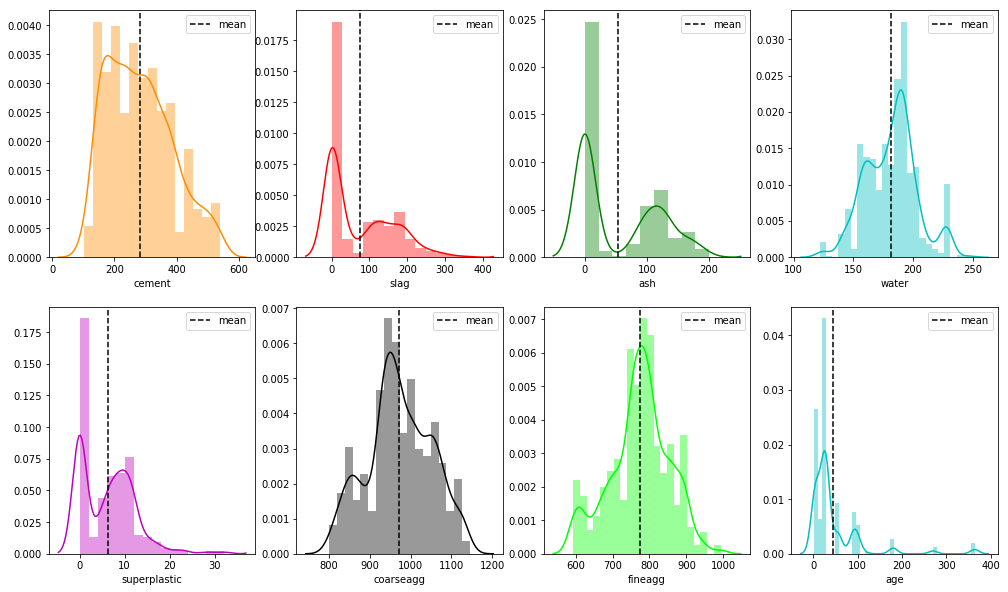

In [10]:
# Analyze the body of the distributions
cols = [i for i in concrete.columns if i not in 'strength']
fig = plt.figure(figsize=(17,10))
for i,j,k in itertools.zip_longest(cols, range(len(cols)), ["darkorange","r","g","c","m","k","lime","c"]):
    plt.subplot(2,4,j+1)
    ax = sns.distplot(concrete[i],color=k)
    plt.axvline(concrete[i].mean(),linestyle="dashed",label="mean",color="k")
    plt.legend(loc="best")

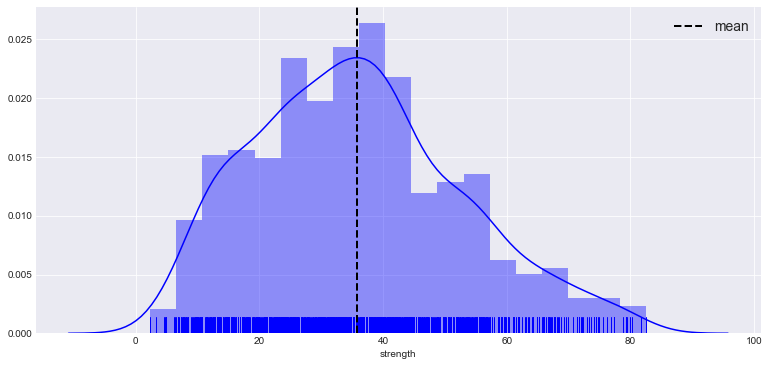

In [11]:
# Target feature "Comprehensive Strength" distribution
plt.figure(figsize=(13,6))
sns.set_style('darkgrid', {'axes.grid' : True})
sns.distplot(concrete["strength"],color="b",rug=True)
plt.axvline(concrete["strength"].mean(), linestyle="dashed", color="k", label='mean', linewidth=2)
plt.legend(loc="best",prop={"size":14})

**Observations:**
- The distribution of *cement* feature seems to be near normal. Rest all features posses skewed observation.
- There are clearly 2 humps visible in *slag*, *ash* and *superplastic* features which has a higher density at 0. So these features must be having high 0s count. Hence our dataset is a mix of multiple clusters wrt to these 3 features.
- Presence of long tails in *slag*, *water*, *superplastic*, *fineagg* and *age* indicates presence of outlier data point.
- Data distribution of target column seems to be close to normal distribution.
- Slight elongated tail for *strength* column indicates the presence of outlier.

In [12]:
# Find out the count of 0s in each column
(concrete == 0).sum(axis=0)

cement            0
slag            471
ash             566
water             0
superplastic    379
coarseagg         0
fineagg           0
age               0
strength          0
dtype: int64

**Observations:**
- There are **huge number of 0s** in *slag*, *ash* and *superplastic* column.
- As per the discussion in the domain understanding section, *slag*, *ash* and *superplastic* are not the basic ingredients of concrete. Hence the observations in our dataset having 0s for these features are NO mistake. They do not represent NULL or missing values. In fact they are intentional. Hence we **no longer require to do NULL treatment**.

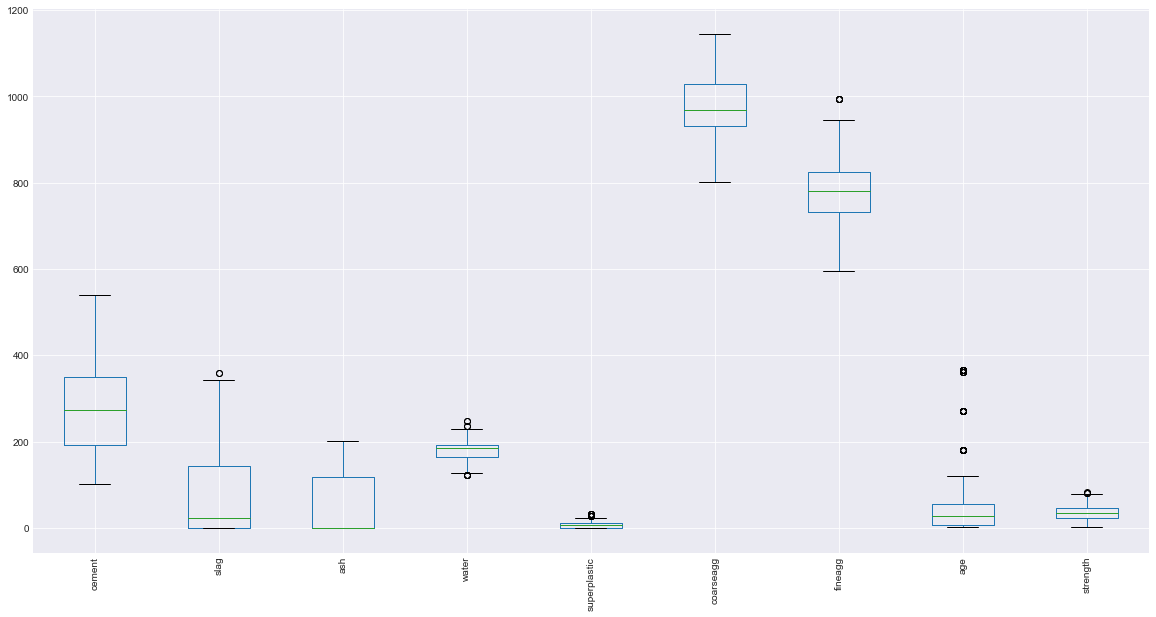

In [13]:
# Plot the central tendency of the dataset
_, bp = concrete.boxplot(return_type='both', figsize=(20,10), rot='vertical')

fliers = [flier.get_ydata() for flier in bp["fliers"]]
boxes = [box.get_ydata() for box in bp["boxes"]]
caps = [cap.get_ydata() for cap in bp['caps']]
whiskers = [whiskers.get_ydata() for whiskers in bp["whiskers"]]

In [14]:
# Describe the dataset with various other summary and statistics
conc_desc = concrete.describe()
conc_desc.loc['IQR'] = conc_desc.loc['75%'] - conc_desc.loc['25%']
for idx, col in enumerate(concrete.columns):
    conc_desc.loc['min_whis',col] = caps[2 * idx][0]
    conc_desc.loc['max_whis',col] = caps[2 * idx + 1][0]
conc_desc

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000,1030.000,1030.000,1030.000,1030.000,1030.000,1030.000,1030.000,1030.000
mean,281.168,73.896,54.188,181.567,6.205,972.919,773.580,45.662,35.818
std,104.506,86.279,63.997,21.354,5.974,77.754,80.176,63.170,16.706
min,102.000,0.000,0.000,121.800,0.000,801.000,594.000,1.000,2.330
25%,192.375,0.000,0.000,164.900,0.000,932.000,730.950,7.000,23.710
50%,272.900,22.000,0.000,185.000,6.400,968.000,779.500,28.000,34.445
75%,350.000,142.950,118.300,192.000,10.200,1029.400,824.000,56.000,46.135
max,540.000,359.400,200.100,247.000,32.200,1145.000,992.600,365.000,82.600
IQR,157.625,142.950,118.300,27.100,10.200,97.400,93.050,49.000,22.425
min_whis,102.000,0.000,0.000,126.600,0.000,801.000,594.000,1.000,2.330


**Observations:**
- There are 6 features (*slag*, *water*, *superplastic*, *fineagg*, *age* and *strenghth*) whose min and max values lie out side of the min_whis and max_whis boundary.
- Also obvious from the central tendency and the box plots above, these features are having outliers in their distribution.

In [15]:
# Count the number of outlier data points present in each feature
for idx, col in enumerate(concrete.columns):
    print(col, '(%d)--' % len(fliers[idx]), fliers[idx])

cement (0)-- []
slag (2)-- [359.4 359.4]
ash (0)-- []
water (9)-- [121.8 121.8 121.8 121.8 121.8 247.  246.9 237.  236.7]
superplastic (10)-- [28.2 28.2 32.2 32.2 28.2 32.2 32.2 28.2 32.2 28.2]
coarseagg (0)-- []
fineagg (5)-- [992.6 992.6 992.6 992.6 992.6]
age (59)-- [180. 365. 180. 180. 180. 365. 180. 270. 180. 360. 365. 365. 180. 180.
 270. 270. 270. 270. 180. 180. 270. 360. 180. 360. 180. 365. 360. 365.
 365. 180. 270. 180. 180. 365. 180. 180. 270. 270. 180. 180. 365. 365.
 180. 365. 360. 180. 270. 180. 270. 180. 365. 360. 270. 365. 180. 180.
 365. 180. 270.]
strength (4)-- [81.75 79.99 82.6  80.2 ]


### Outlier Treatement
**Min/Max Replacement:** Outliers from *slag*, *water* and *fineagg* features will be replaced by their nearest whisker ends in the central tendency. Means datapoints which are $1.5*IQR$ below the $Q_1$ will be replaced by min end of lower whisker and which are $1.5*IQR$ above the $Q_3$ will be replaced by max end of higher whisker.

**NOTE:**
- There are 2 outlier data points in *slag* feature which are almost 17 units greater than 1.5*IQR. We will cap them using min/max replacement.
- *Water* column has lower end outliers close to end of the lower whiskers but higher end outliers are more far from higher end whiskers. So we will be capping the upper end outliers.
- The column *Superplastic* has outliers very close to whiskers end. So we will not be treating these fliers.
- *fineagg* features has 5 fliers and they are almost 50 units away from 1.5*IQR. As the gap is quite big, we will use min/max replacement to cap them.
- *Age* is a feature which to test for the comprehensive strength of a concrete, can be varied by a large spread of data. Different observations in age column are meant for allowing concrete to undergo rest for wide range of observations. So, we will not treat these outliers.
- The fliers in the *strength* column lies very close to the end of the upper whisker (79.4). Hence we will not be considering these 4 points as outliers and will live with that.

In [16]:
# outliers capping for slag
q3 = concrete.slag.quantile(0.75)
high = q3 + 1.5*(q3 - concrete.slag.quantile(0.25))
concrete.loc[(concrete.slag > high), 'slag'] = caps[3][0]
# outliers capping for water
q3 = concrete.water.quantile(0.75)
high = q3 + 1.5*(q3 - concrete.water.quantile(0.25))
concrete.loc[(concrete.water > high), 'water'] = caps[7][0]
# outliers capping for fineagg
q3 = concrete.fineagg.quantile(0.75)
high = q3 + 1.5*(q3 - concrete.fineagg.quantile(0.25))
concrete.loc[(concrete.fineagg > high), 'fineagg'] = caps[13][0]

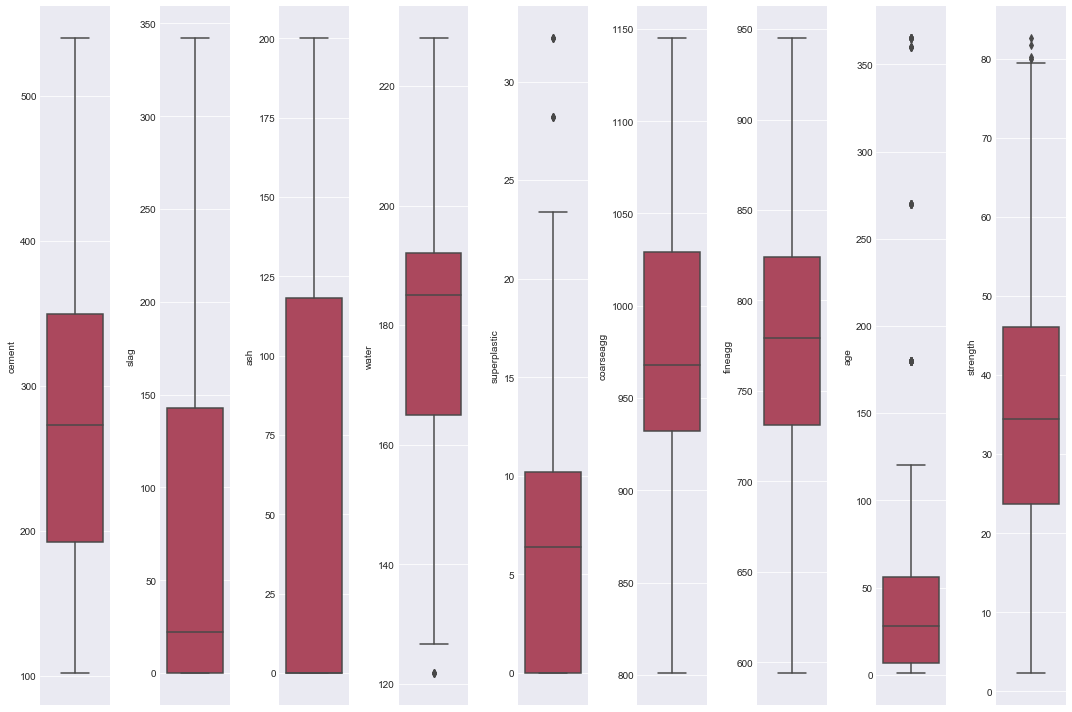

In [17]:
# Check the dataset after Outlier treatment
sns.set_style('darkgrid')
plt.figure(figsize=(15,10))
for idx, col in enumerate(concrete.columns):
    plt.subplot(1, len(concrete.columns), idx+1)
    sns.boxplot(y=concrete[col], palette='inferno')
plt.tight_layout()

#### Analyze the compressive strength based on age

In [18]:
# Function to calculate the age span based on the age column
conc_age_span = concrete.copy()
def age_span(age):
    weeks = int(np.round(age/7))
    if weeks <= 2:
        return '1 week' if weeks <= 1 else '2 weeks'
    else: 
        mnths = int(np.round(age/30))
        return str(mnths) + ' month' if mnths == 1 else str(mnths) + ' months'
       
conc_age_span['age_span'] = conc_age_span['age'].apply(age_span)
conc_age_span.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,age_span
0,141.300,212.000,0.000,203.500,0.000,971.800,748.500,28,29.890,1 month
1,168.900,42.200,124.300,158.300,10.800,1080.800,796.200,14,23.510,2 weeks
2,250.000,0.000,95.700,187.400,5.500,956.900,861.200,28,29.220,1 month
3,266.000,114.000,0.000,228.000,0.000,932.000,670.000,28,45.850,1 month
4,154.800,183.400,0.000,193.300,9.100,1047.400,696.700,28,18.290,1 month


In [19]:
# Get the list of unique age spans
conc_age_span['age_span'].unique()

array(['1 month', '2 weeks', '3 months', '1 week', '2 months', '6 months',
       '12 months', '9 months', '4 months'], dtype=object)

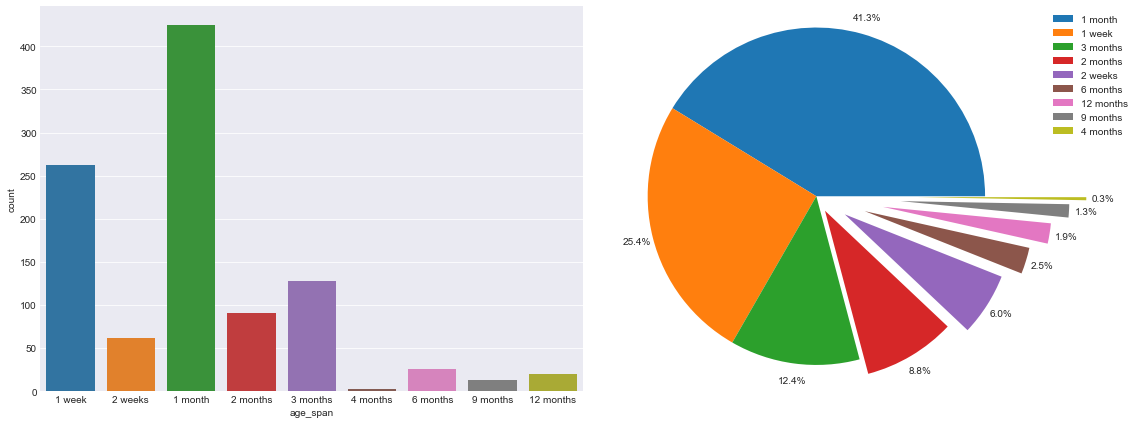

In [20]:
# Visualize the Age distribution
order = ['1 week','2 weeks','1 month','2 months','3 months','4 months','6 months','9 months','12 months']

fig, axes = plt.subplots(1, 2, figsize=(16,6))
sns.countplot(conc_age_span.age_span, order=order, ax=axes[0])
explode = (0,0,0,0.1,0.2,0.3,0.4,0.5,0.6)
_ = axes[1].pie(conc_age_span.age_span.value_counts(), autopct='%1.1f%%', explode=explode, pctdistance=1.1)
axes[1].legend(labels=conc_age_span.age_span.value_counts().index,loc="best")
axes[1].axis('equal')
plt.tight_layout()

In [21]:
# Get the central tendency grouped by age span
age_span = conc_age_span.groupby("age_span")["strength"].describe().loc[order].reset_index()
age_span

,age_span,count,mean,std,min,25%,50%,75%,max
0,1 week,262.000,22.308,12.854,2.330,12.663,18.520,30.245,59.090
1,2 weeks,62.000,28.751,8.638,12.840,22.373,26.540,33.615,59.760
2,1 month,425.000,36.749,14.711,8.540,26.230,33.760,44.390,81.750
3,2 months,91.000,51.890,14.309,23.250,39.430,51.720,62.695,80.200
4,3 months,128.000,48.441,13.589,21.860,39.328,47.125,56.532,82.600
5,4 months,3.000,39.647,1.104,38.700,39.040,39.380,40.120,40.860
6,6 months,26.000,41.730,10.929,24.100,34.930,40.905,48.258,71.620
7,9 months,13.000,51.272,10.645,38.410,42.130,51.730,55.060,74.170
8,12 months,20.000,42.700,8.349,25.080,38.695,42.030,46.655,56.140


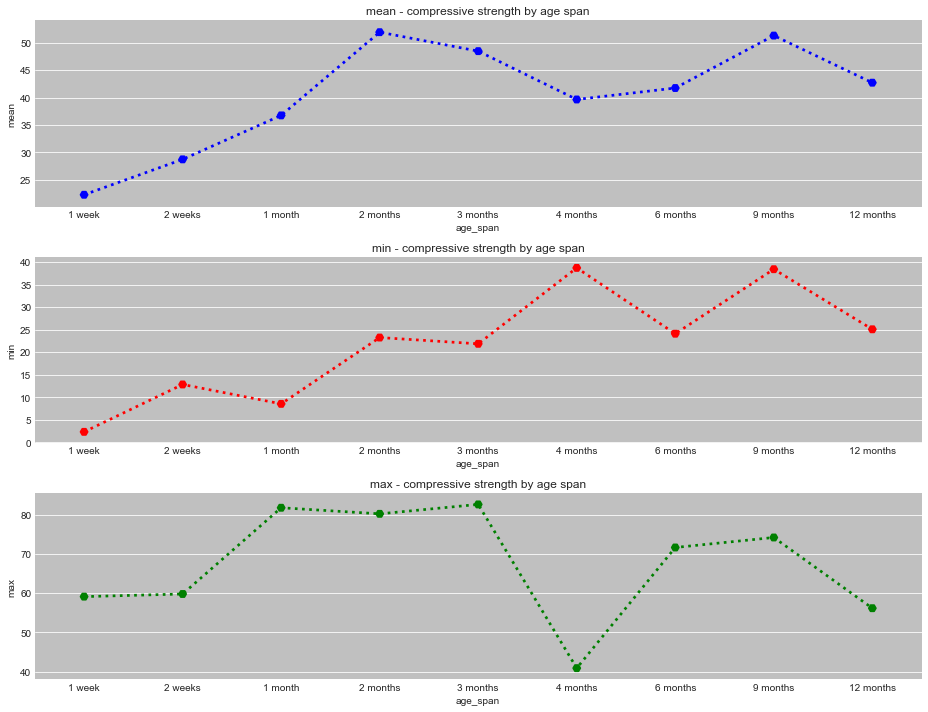

In [22]:
# Visualize the comprehensive strength grouped by age span
cols = ['mean', 'min', 'max']

fig = plt.figure(figsize=(13,10))
for i,j,k in itertools.zip_longest(cols,range(len(cols)),['b','r','g']):
    plt.subplot(3,1,j+1)
    ax = sns.pointplot(x='age_span', y=i, data=age_span, order=order, markers='H', linestyles='dotted', color=k)
    ax.set_facecolor('silver')
    plt.title(i + ' - compressive strength by age span'); fig.tight_layout()

**Observation:**
- Average comprehensive strength increases with increase in the age span for which concrete is exposed to rest. However for some reason it reduced in between 2 months to 4 months.
- Minimum (2nd) plot shows in order to obtain different ranges of comprehensive strengths, age playes a vital role. To obtain certain minimum compressive strength of concrete, it should be exposed to rest for respective bucket of time.

---
### Bivariate Analysis
Let's explore the relationship among the predictor variables and between the predictor variables and target column. We will be using the density curve plus histogram, scatterplot and pairplots for this analysis.
#### Pairplot
Pairplot helps picturizing the pair wise relationship between two variables. It creates a square matrix of no. of continous attributes of the dataset. The diagonal plots represents the histogram and/or the kde plot of a particular attributes where as the upper or lower trangular plots represents the co-linearity of two attributes.

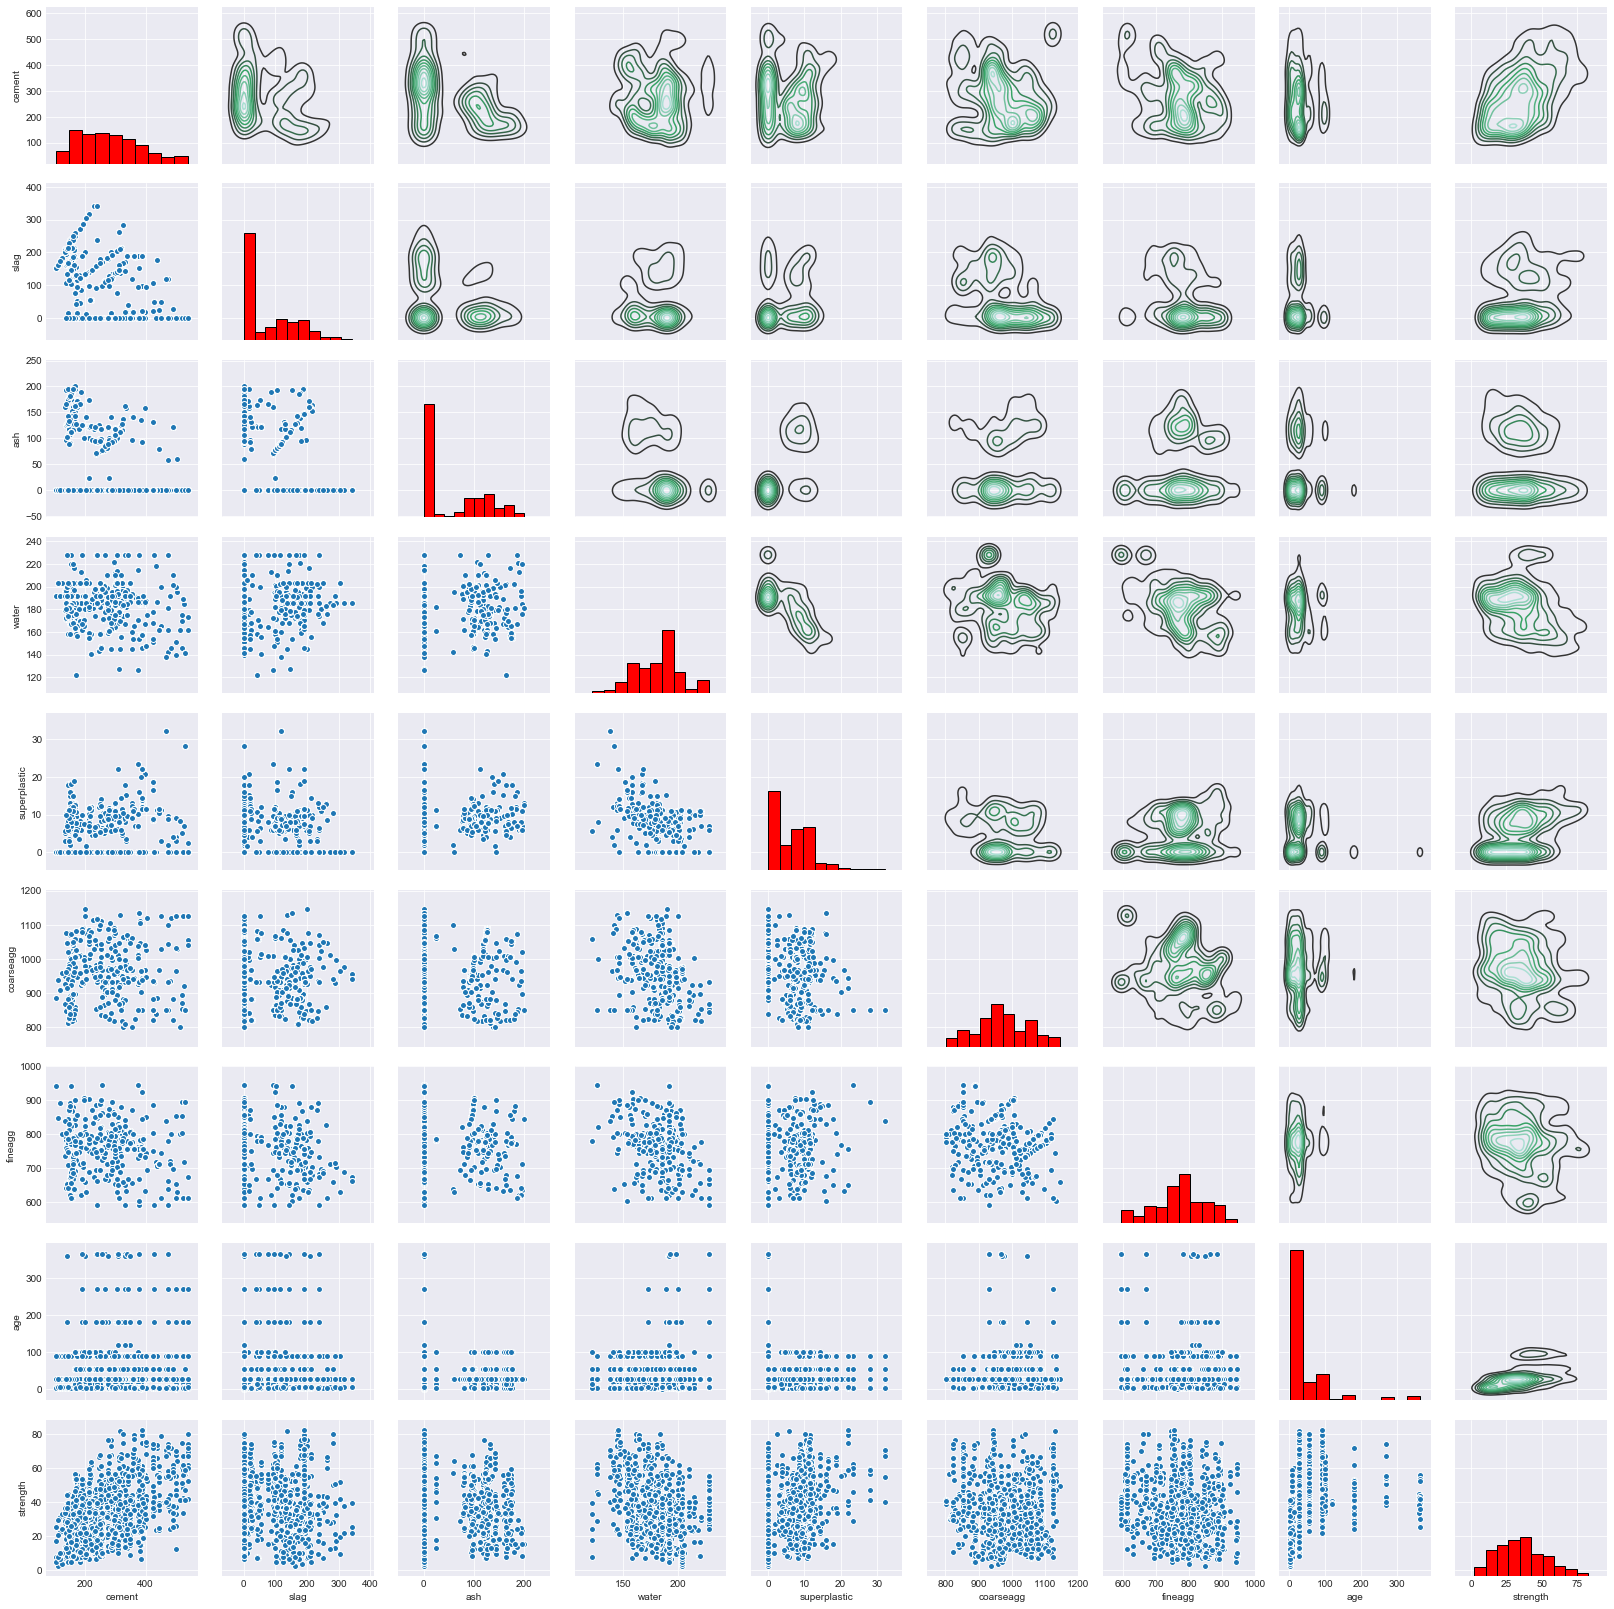

In [23]:
# Create an instance of the PairGrid class.
grid = sns.PairGrid(data=concrete)
# Map a scatter plot to the lower triangle
grid = grid.map_lower(plt.scatter, edgecolor='white')
# Map a histogram to the diagonal
grid = grid.map_diag(plt.hist, bins = 10, color='r', edgecolor='k')
# Map a density plot to the upper triangle
grid = grid.map_upper(sns.kdeplot)

**Observations:**
- Looking at the lower trangle in the above pairplot, all figures have a shape of scattered and cloud structures. This indicates there is very week relationship of the independent variables among each other. Except for *superplastic* vs *water* which seems to be have a strong negative correlation.
- *strength* has a rugby shaped scattered data points with *cement*, which indicates cement is a strong predictor for comprehensive strength compared to all other features.
- Looking at the upper traingle for density plots also depicts the same. No density distibution is linearly associated with any other features except for cement vs strength.
- As we have already discussed, *slag*, *ash* and *superplastic* have a huge volume of 0s in their distribution making them behave as 2 different clusters. So is also interpreted from density diagram where they have 2 clearly distinguished densities in each plot.
- Parallel scatter plots and straight density plots of *age* across indicates it is a predictor which has the lowest relationship with any other features even with the target variable.

#### Regression plot for Strength vs other predictors

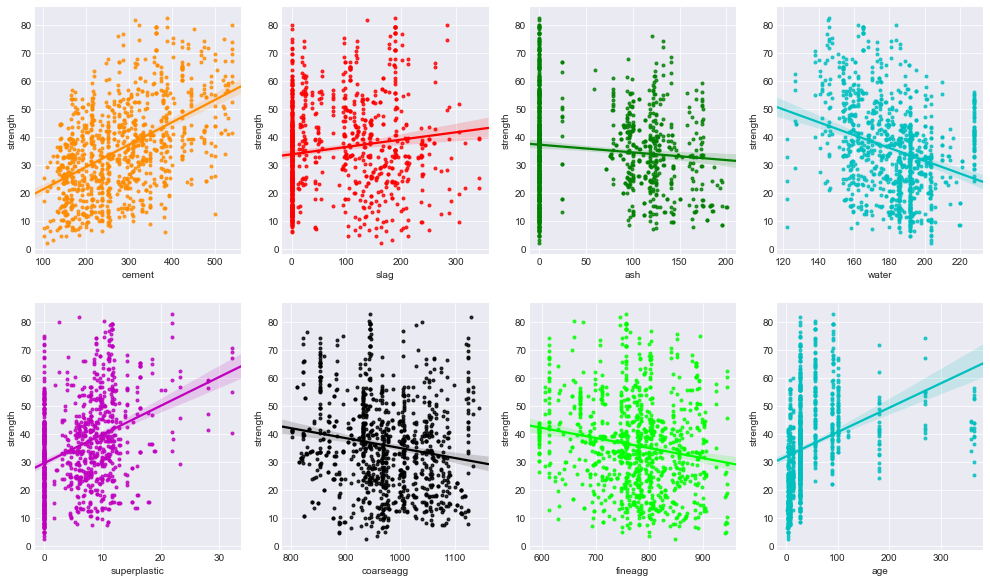

In [24]:
# Analyze the regression line of each predictor vs strength
cols = [i for i in concrete.columns if i not in 'strength']
fig = plt.figure(figsize=(17,10))
for i,j,k in itertools.zip_longest(cols, range(len(cols)), ["darkorange","r","g","c","m","k","lime","c"]):
    plt.subplot(2,4,j+1)
    sns.regplot(i, 'strength', concrete, color=k, marker='.')

The regression line for *cement*, *water*, *superplastic* and *age* seems to have more or less same relationship with *strength* but let's plot the corelation matrix to get the pearson's correlation coefficient for them.

Text(0.5,1,'Correlation between variables')

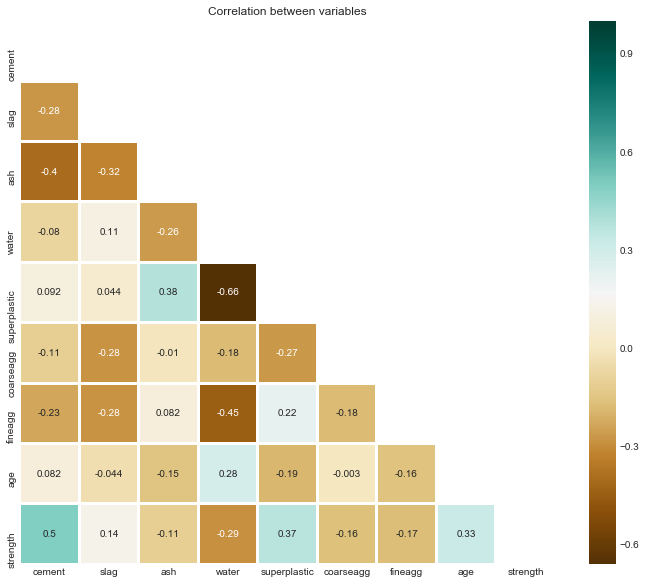

In [25]:
corr = concrete.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(12,10))
with sns.axes_style("white"):
    sns.heatmap(corr,annot=True,linewidth=2, mask=mask, cmap="BrBG")
plt.title("Correlation between variables")

**Observation:**
- The correlation matrix has almost all the cells marked with light shades which indicates the pearson's correlation coeficient for those cells are close to 0. Which means variables are not much corelated with each other.
- *cement* vs *strength* shows the coefficient to be 0.5 and the *water* vs *superplastic* to be -0.66, the highest among all.

---
## Deliverable -2  (Feature Engineering)
1. Identify opportunities (if any) to create a composite feature, drop a feature. 
2. Decide on complexity of the model, should it be simple linear model in terms of parameters or would a quadratic or higher degree help
3. Explore for gaussians. If data is likely to be a mix of gaussians, explore individual clusters and present your findings in terms of the independent attributes and their suitability to predict strength

### Feature Generation
Feature Generation is the technique of Feature engineering which deals with raw data to generate additional features which can describe higher degree of relationship with target variable.
- ### Composite Feature
Let's analyze the relationship of some composite features with compressive strength. Features like water to cement ratio, aggreagets to cement ratio etc. Remember **feature cement only has 0.5 pearson's correlation coeficient** with strength. Let's analyze if any composite feature is even more strong predictor of compressive strength.

In [26]:
# Feature 1 - Water to Cement ratio
np.corrcoef(x=concrete.cement/concrete.water, y=concrete.strength)

array([[1.        , 0.55959384],
       [0.55959384, 1.        ]])

In [27]:
# Feature 2 - Cement to Coarse Aggregate ratio
np.corrcoef(x=concrete.cement/concrete.coarseagg, y=concrete.strength)

array([[1.        , 0.51180066],
       [0.51180066, 1.        ]])

In [28]:
# Feature 3 - Cement to Fine Aggregate ratio
np.corrcoef(x=concrete.cement/concrete.fineagg, y=concrete.strength)

array([[1.        , 0.47841247],
       [0.47841247, 1.        ]])

In [29]:
# Feature 4 - Cement to Aggregates ratio
np.corrcoef(x=concrete.cement/(concrete.coarseagg+concrete.fineagg), y=concrete.strength)

array([[1.        , 0.50949154],
       [0.50949154, 1.        ]])

In [30]:
# Feature 5 - Admixtures to Cement ratio
np.corrcoef(x=(concrete.superplastic + concrete.slag + concrete.ash)/concrete.cement, y=concrete.strength)

array([[ 1.        , -0.16341629],
       [-0.16341629,  1.        ]])

**Observations:**
- Out of 5 composite features, upon arranging them in descending order of their correlation coefficient
  - **Water:Cement**: 0.55
  - **Cement:CoarseAggregate**: 0.51
  - **Cement:Aggregates**: 0.50
  - **Cement:FineAggregate**: 0.47
  - **Admictures:Cement**: 0.16 (negative)
- None of the above composite features are proven to be a strong predictor of compressive strength.
- Only *Water to Cement* ratio has a very little bit (0.05) greater correlation coefficient than Cement alone. THis composite feature is also not a very strong predictor of strength. For just 0.05 increase in correlation coefficient, we will not increase the dimension of mathematical space.

Hence we are **not getting any strong correlationship out of any composite features with strength**, let's go ahead and explore Polynomial features.

- ### Polynomial Feature
Generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. Let's generate polynomial feature of 2nd degree with interaction only feature.

In [31]:
# Instantiate an poly object with 2nd degree
poly = PolynomialFeatures(degree=2, interaction_only=True)

In [32]:
# Fit and transform the X or input features
concrete_poly = poly.fit_transform(concrete.drop('strength', axis=1))

In [33]:
# Get the shape of the newly generated features
print("Number of rows    :",concrete_poly.shape[0])
print("Number of columns :",concrete_poly.shape[1])

Number of rows    : 1030
Number of columns : 37


**Observation:**
- 37 dimensions are created out of 8 original dimensions.

In [34]:
# Join the strength column to create a polynomial dataset
concrete_poly = pd.DataFrame(concrete_poly,columns=poly.get_feature_names())
concrete_poly['strength'] = concrete['strength']
concrete_poly.shape

(1030, 38)

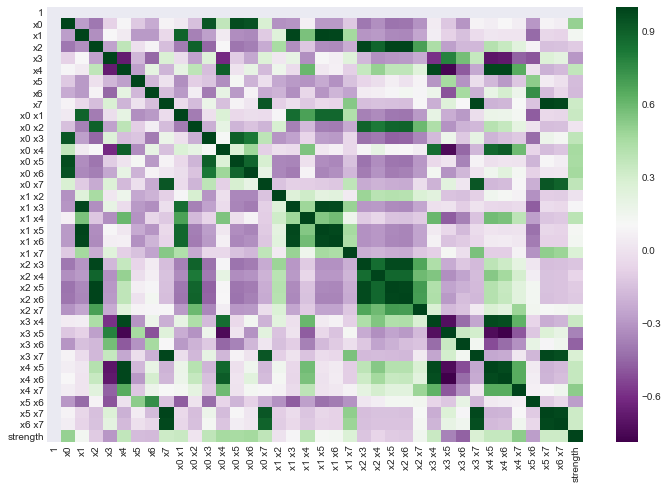

In [35]:
# Visualize the correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(concrete_poly.corr(), cmap="PRGn")

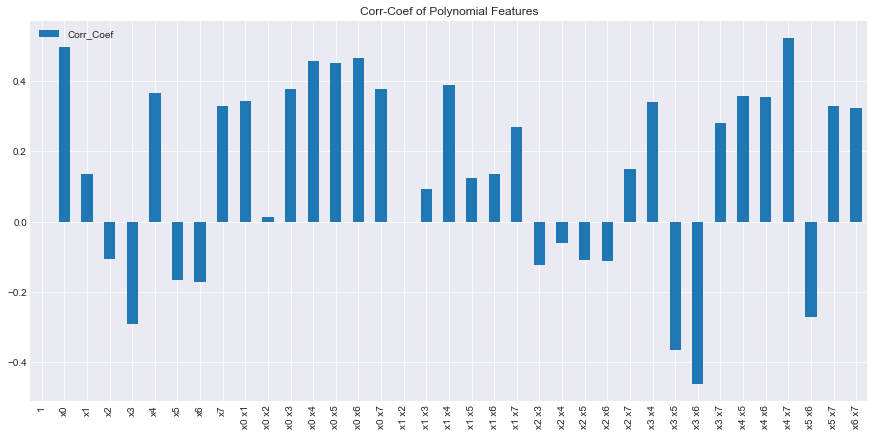

In [36]:
# Check the correlation coefficient of all the polynomial features with strength
poly_corrcoef = [np.corrcoef(concrete_poly[col], concrete_poly.strength)[0,1] for col in concrete_poly.columns[:-1]]
pd.DataFrame(poly_corrcoef, index = concrete_poly.columns[:-1], 
             columns=['Corr_Coef']).plot(kind='bar', figsize=(15,7), title='Corr-Coef of Polynomial Features')

**Observations:**
- *Strength* row/column in the heatmap has all the blocks light shaded as well as the whole polynomial features dataset has a greater area light shaded. In the cmap indicator bar, the light shade area represent 0 or close to 0. So this polynomial features dataset has very less correlationship coming out among all 37 features and with the strength column.
- The bar plot for correlation coefficient of all polynomial features with strength indicates NO newly generated features are a very good strong predictor for compressive strength. All have a coefficient less than or close to 0.5, which anyway only cement feature has with strength.
- We will not be increasing the sparsity of the dataset by incrementing to such a large dimensional mathematical space for NO considerable increase in the correlationship. Hence we will **not be considering polynomial features** to feed to our model.

### Feature Selection
Feature Selection is the technique of Feature engineering which analyzes the feature space to squeze out all the information to explain as much as variance it can there by getting rid of few unrelated dimensions.
#### Standardization
Standardization or z-scores is the most commonly used method. It converts all indicators to a common scale with an average/mean of 0 and standard deviation of 1. As most of the features in our dataset have units Kg/m3 and age and strength have days and MPa as the units of measurements respectively, we apply z-score to convert them into a single scale.

In [37]:
concrete = concrete.apply(zscore)
concrete.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000,1030.000,1030.000,1030.000,1030.000,1030.000,1030.000,1030.000,1030.000
mean,-0.000,0.000,0.000,-0.000,0.000,0.000,-0.000,0.000,-0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-1.715,-0.858,-0.847,-2.816,-1.039,-2.212,-2.254,-0.707,-2.006
25%,-0.850,-0.858,-0.847,-0.783,-1.039,-0.527,-0.533,-0.612,-0.725
50%,-0.079,-0.602,-0.847,0.164,0.033,-0.063,0.077,-0.280,-0.082
75%,0.659,0.802,1.002,0.495,0.669,0.727,0.637,0.164,0.618
max,2.478,3.114,2.281,2.192,4.354,2.214,2.157,5.058,2.802


- ### Principal Component Analysis
Principal Component Analysis (PCA) uses "orthogonal linear transformation" to introduces a lower-dimensional representation of the dataset. It finds a sequence of linear combination of the variables called the principal components that explain the maximum variance and summarize the most information in the data and are mutually uncorrelated with each other. PCA allows us to quantify the trade-offs between the number of features we utilize and the total variance explained by the data. Let's analyze PCA to find out no of features which can explain more than 97% of cumulative variance.

In [38]:
# Create a covariance matrix and calculate eigen values
pca = PCA().fit(concrete.drop('strength', axis=1))
# calculate variance ratios
var = pca.explained_variance_ratio_;var

array([0.28521562, 0.1770492 , 0.16746411, 0.12683569, 0.11910269,
       0.09852794, 0.02200866, 0.00379609])

In [39]:
# cumulative sum of variance explained with [n] features
eigen_vals = np.round(pca.explained_variance_ratio_, decimals=3)*100
np.cumsum(eigen_vals)

array([ 28.5,  46.2,  62.9,  75.6,  87.5,  97.4,  99.6, 100. ])

#### Scree Plot

In [40]:
threshold=97
def generate_scree_plot(covar_matrix, threshold):
    var = covar_matrix.explained_variance_
    eigen_vals = np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)

    f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,7))
    f.suptitle('PCA Scree plot')

    ax1.plot(np.arange(1, len(var)+1), var, '-go')
    ax1.set_xticks(np.arange(1, len(var)+1))
    ax1.set_title('Explained Variance')
    ax1.set_xlabel('# of Components')
    ax1.set_ylabel('Eigen Values')

    ax2.plot(np.arange(1, len(eigen_vals)+1), eigen_vals, ':k', marker='o', markerfacecolor='red', markersize=8)
    ax2.set_xticks(np.arange(1, len(eigen_vals)+1))
    ax2.axhline(y=threshold, color='r', linestyle=':', label='Threshold(95%)')
    ax2.legend()
    ax2.plot(np.arange(sum(eigen_vals <= threshold) + 1, len(eigen_vals) + 1), 
             [val for val in eigen_vals if val > threshold], '-bo')
    ax2.set_title('Cumulative sum Explained Variance Ratio')
    ax2.set_xlabel('# of Components')
    ax2.set_ylabel('% Variance Explained')

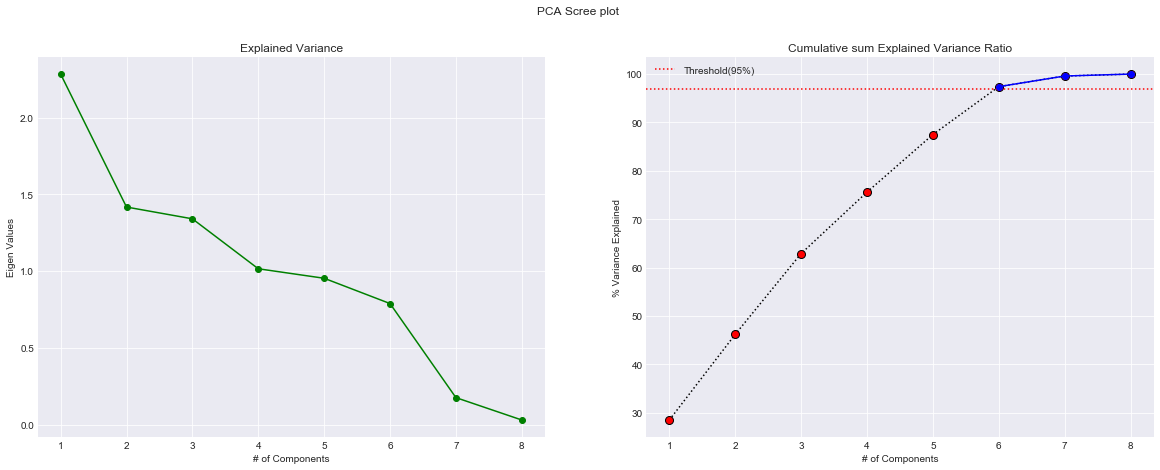

In [41]:
generate_scree_plot(pca, threshold=threshold)

#### Cumulative Eigen value Plot

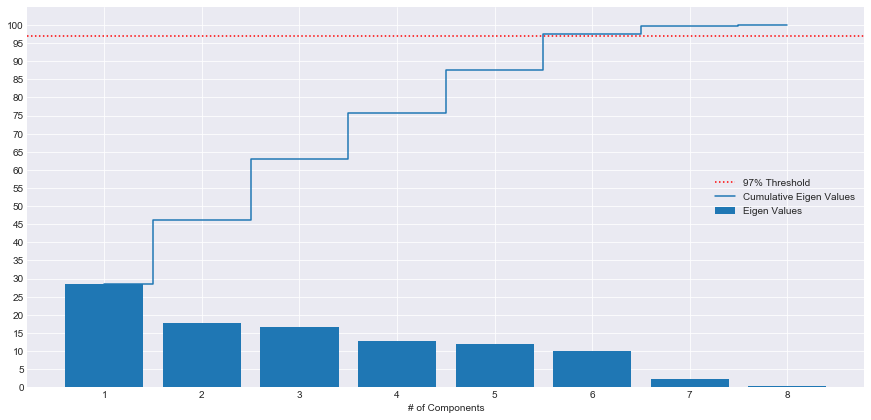

In [42]:
plt.figure(figsize=(15,7))
plt.axhline(y=threshold, color='r', linestyle=':', label='97% Threshold')
plt.bar(np.arange(1, len(eigen_vals) + 1), eigen_vals, label='Eigen Values')
plt.plot(np.arange(1, len(np.cumsum(eigen_vals))+1), np.cumsum(eigen_vals), 
         drawstyle='steps-mid', label='Cumulative Eigen Values')
plt.yticks(np.arange(0,105,5))
_, _ = plt.xticks(np.arange(1,9,1)), plt.xlabel('# of Components')
plt.legend()

**Observations:**
- There are **6 features which explains more than 97% of variance** cumulatively in the dataset

In [43]:
# Create a new matrix using the n components
X = concrete.drop('strength', axis=1)
X_proj = PCA(n_components=6).fit_transform(X)
y = concrete.strength
X_proj.shape

(1030, 6)

**Train Test Split**

Divide both the original and PCA projected datasets into **80:20** ratio for train and test respectively.

In [44]:
# Divide the original and the projected dataset into 80:20 ration for train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_proj_train, X_proj_test, y_train, y_test = train_test_split(X_proj, y, test_size=0.2, random_state=1)

print('Original dimensions for train test split:\n', X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print('\nProjected dimensions for train test split:\n', X_proj_train.shape, X_proj_test.shape, y_train.shape, y_test.shape)

Original dimensions for train test split:
 (824, 8) (206, 8) (824,) (206,)

Projected dimensions for train test split:
 (824, 6) (206, 6) (824,) (206,)


### Linear Models
Linear models are the simplest parametric methods. A regression is a prediction where the target is continuous in nature.

We are going to utilize **Standard Linear Regression** and **Regularized Linear Regression** for both original and projected dataset to verify whether there are any linear relationship of the predictors with that of target variable *stregth*.

#### $R^2$ Score
An important metric used in regression is called **cofficient of determinant** or **R-Square**. It measures the amount of variance of the prediction which is explained by the dataset.
$$R^2=1-\frac{\sum_i{r_i^2}}{\sum_i{(y_i-\bar{y})^2}}$$
### LinearRegression (Original Dataset)

In [45]:
# Fit the LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [46]:
# Print the coefficients of each attributes
lr.coef_

array([ 0.80069269,  0.57885401,  0.36540177, -0.15066973,  0.10409791,
        0.1174407 ,  0.16964038,  0.42844968])

In [47]:
# Calculate the score of Linear Regression
print('Training score  :', lr.score(X_train, y_train))
print('Testing score   :', lr.score(X_test, y_test))

Training score  : 0.6103583166501315
Testing score   : 0.6337440578548983


In [48]:
# Calculate mean R2 score
print('Mean R-Square score:', cross_val_score(lr, X, y, cv=10, scoring='r2').mean())

Mean R-Square score: 0.5933103866041729


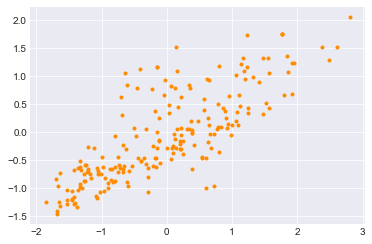

In [49]:
plt.scatter(y_test, lr.predict(X_test), c='darkorange', marker='.')

### LinearRegression (PCA projected Dataset)

In [50]:
# Fit the LinearRegression
lr = LinearRegression()
lr.fit(X_proj_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [51]:
# Print the coefficients of each attributes
lr.coef_

array([-3.15538429e-02,  1.45333453e-01,  4.76493963e-01,  9.45583915e-05,
        2.97625638e-01,  3.88217556e-01])

In [52]:
# Calculate the score of Linear Regression
print('Training score  :', lr.score(X_proj_train, y_train))
print('Testing score   :', lr.score(X_proj_test, y_test))

Training score  : 0.5523710313802285
Testing score   : 0.603985397243481


In [53]:
# Calculate mean R2 score
print('Mean R-Square score:', cross_val_score(lr, X_proj, y, cv=10, scoring='r2').mean())

Mean R-Square score: 0.5436341376449076


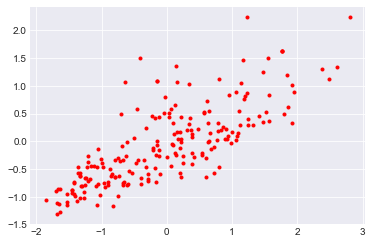

In [54]:
plt.scatter(y_test, lr.predict(X_proj_test), c='r', marker='.')

**Observations:**
- Linear Regression gives very poor result for both original and PCA projected dataset.
- Mean $R^2$ cross validation score is not at all promising for Linear model.

Let's apply regularization technique to see how the performance of the linear model gets impacted.
### Regularised Linear Model
Linear models are being parametrc model contribute to more towards Bias Error. Regularizarion is needed inorder to decrease the bias error so we can find a sweet spot where the performance of our model stands promising for unseen data. 2 such regularized linear models are:
1. Ridge<br/>
**Ridge Regression** (aka **Tikhonov Regularization**) imposes an additional shrinkage penalty to the ordinary least squares cost fucntion to limit its squared $L_2$ norm.
2. Lasso<br/>
A **Lasso Regression** imposes a penalty on the $L_1$ norm to determine a potentially higher number of null coefficients.

### Ridge Regression (Original Dataset)

In [55]:
# Fit the Ridge regularised linear model
rg = Ridge(alpha=0.1)
rg.fit(X_train, y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [56]:
# Print the coefficients of each attributes
rg.coef_

array([ 0.79915258,  0.57734526,  0.3640597 , -0.15172704,  0.10407029,
        0.11639858,  0.16828587,  0.42832932])

In [57]:
# Calculate the score of Linear Regression
print('Training score  :', rg.score(X_train, y_train))
print('Testing score   :', rg.score(X_test, y_test))

Training score  : 0.6103579676896538
Testing score   : 0.6338320854847428


In [58]:
# Calculate mean R2 score
print('Mean R-Square score:', cross_val_score(rg, X, y, cv=10, scoring='r2').mean())

Mean R-Square score: 0.5933161223688802


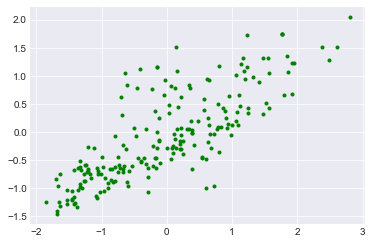

In [59]:
plt.scatter(y_test, rg.predict(X_test), c='g', marker='.')

### Ridge Regression (PCA projected Dataset)

In [60]:
# Fit the Ridge regularised linear model
rg = Ridge(alpha=0.1)
rg.fit(X_proj_train, y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [61]:
# Print the coefficients of each attributes
rg.coef_

array([-3.15501718e-02,  1.45320063e-01,  4.76452066e-01,  9.35901674e-05,
        2.97586562e-01,  3.88158606e-01])

In [62]:
# Calculate the score of Linear Regression
print('Training score  :', rg.score(X_proj_train, y_train))
print('Testing score   :', rg.score(X_proj_test, y_test))

Training score  : 0.5523710244182394
Testing score   : 0.6039707227528059


In [63]:
# Calculate mean R2 score
print('Mean R-Square score:', cross_val_score(rg, X_proj, y, cv=10, scoring='r2').mean())

Mean R-Square score: 0.5436356933838689


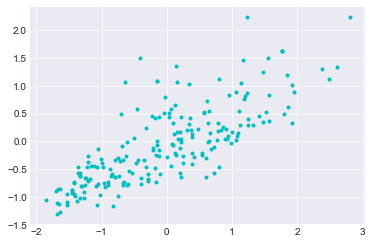

In [64]:
plt.scatter(y_test, rg.predict(X_proj_test), c='c', marker='.')

### Lasso Regression (Original Dataset)

In [65]:
# Fit the Lasso regularised linear model
ls = Lasso(alpha=0.1)
ls.fit(X_train, y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [66]:
# Print the coefficients of each attributes
ls.coef_

array([ 0.3938138 ,  0.15413176,  0.        , -0.13662698,  0.1690535 ,
       -0.        , -0.        ,  0.2685882 ])

In [67]:
# Calculate the score of Linear Regression
print('Training score  :', ls.score(X_train, y_train))
print('Testing score   :', ls.score(X_test, y_test))

Training score  : 0.5245177483979859
Testing score   : 0.5208281427757154


In [68]:
# Calculate mean R2 score
print('Mean R-Square score:', cross_val_score(ls, X, y, cv=10, scoring='r2').mean())

Mean R-Square score: 0.508579200983826


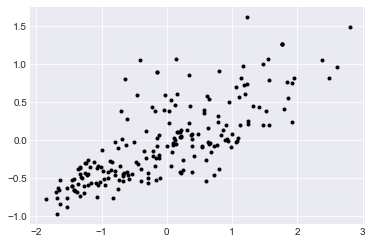

In [69]:
plt.scatter(y_test, ls.predict(X_test), c='k', marker='.')

### Lasso Regression (PCA projected Dataset)

In [70]:
# Fit the Lasso regularised linear model
ls = Lasso(alpha=0.1)
ls.fit(X_proj_train, y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [71]:
# Print the coefficients of each attributes
ls.coef_

array([-0.        ,  0.07406012,  0.40203022, -0.        ,  0.1884781 ,
        0.26200721])

In [72]:
# Calculate the score of Linear Regression
print('Training score  :', ls.score(X_proj_train, y_train))
print('Testing score   :', ls.score(X_proj_test, y_test))

Training score  : 0.5115990645549109
Testing score   : 0.5195434052473067


In [73]:
# Calculate mean R2 score
print('Mean R-Square score:', cross_val_score(ls, X_proj, y, cv=10, scoring='r2').mean())

Mean R-Square score: 0.5067428643635326


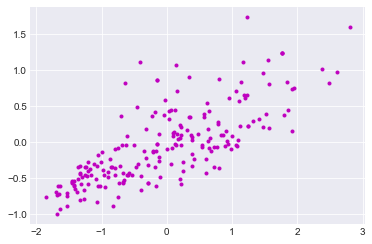

In [74]:
plt.scatter(y_test, ls.predict(X_proj_test), c='m', marker='.')

**Observations:**
- Both Ridge and Lasso performed very poorly in terms of training and test scores. The mean $R^2$ cross validation scores are also very low for both of them on both original and PCA projected dataset.
- None of the scatter plots are close to look like a regressor line. They are having much more variances among predicted and actual data.
- So, Neither **Ridge** nor **Lasso** regularized linear models are able to predict the compressive strength of the cement with an acceptable accuracy.

Hence, to conclude, this problem of determining the compressive strength of concrete based on it's ingredients quantity, as a whole, doesn't belong to a problem that can be addressed by any Linear family algorithms. The model complexity required is of non-parametric. 

We have noticed few of the features in the dataset posses a distribution with mix of multiple gaussians in the bi-variate analysis section. Let's apply clustering technique to find if there are any distiguished clusters and their suitability in compressive strength prediction.

### K-Means Clustering
K-Means clustering is one of the simplest and popular unsupervised machine learning algorithm for clustering. It identifies k number of centroids, and then allocates every data point to their nearest cluster, while keeping the centroids as small as possible. The algorithm works as follows:
- **Initialize Means** - First initialize k data points randomly called means
- **Euclidean DIstance** - Categorize each item to its closest mean and update the mean's coordinates, which are the averages of the items categorized in that mean so far.
- **Update Mean** - Repeat the process for a given number of iterations to find the best optimized clusters.

#### Optimized Intertia - Elbow Analysis
The technique used to find out the optimized k value. There are 2 gaussians present in each of the 3 features (*slag*, *ash* and *superplastic*) is what we observed in the pairplot. Hence we will analyze more the data for more than 6, let's take 14 clusters.

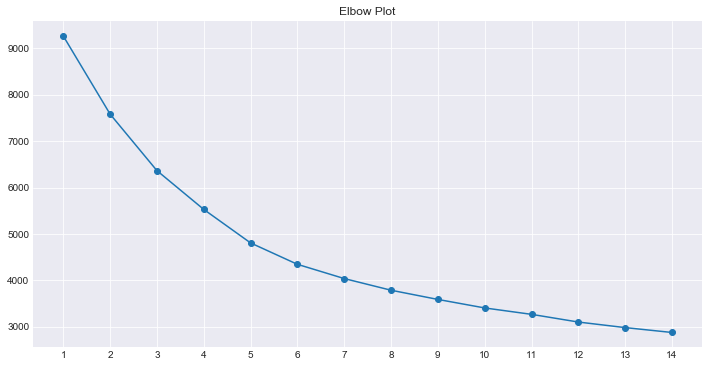

In [75]:
k_range = range(1,15)
kmeans = [KMeans(n_clusters=n) for n in k_range]
sse = [kmeans[i].fit(concrete).inertia_ for i in range(len(kmeans))]
plt.figure(figsize=(12,6))
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Plot')
_ = plt.xticks(k_range)

**Observations:**
- **NO stip descent is observed** in the Elbow Analysis plot. The decrease in sum of sqaured errors are pretty much smooth there by making it difficult to find out an optimed no. of cluster.
- So we will go by our intuation from pairplot to **consider 6 clusters** and analyze the suitablity of prediction.

In [76]:
# Initialize 6 centroid clusters and fit the dataset
kmeans = KMeans(n_clusters= 6, random_state=1)
kmeans.fit(concrete)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

Text(0,0.5,'Bin Counts')

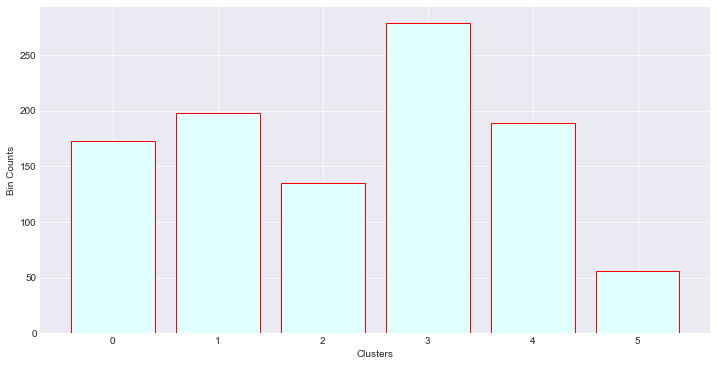

In [77]:
# Find out the count of observations in each clusters
labels = kmeans.labels_
plt.figure(figsize=(12,6))
plt.bar(np.unique(labels), np.bincount(labels), color='lightcyan', edgecolor='red')
plt.xlabel('Clusters')
plt.ylabel('Bin Counts')

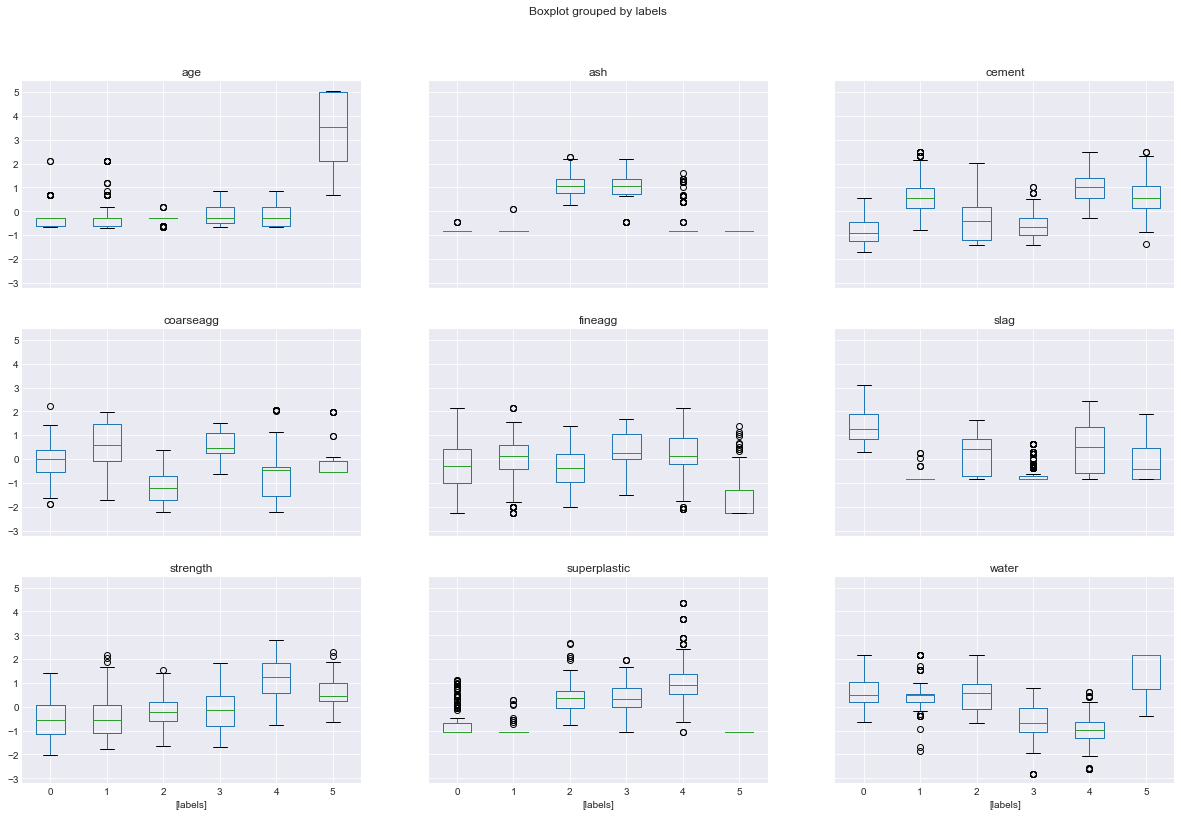

In [78]:
## Creating a new dataframe only for labels and converting it into categorical variable
cluster_labels = pd.DataFrame(labels , columns = list(['labels']))
cluster_labels['labels'] = cluster_labels['labels'].astype('category')
# Join the labels with original dataset 
concrete_labeled = concrete.join(cluster_labels)
_ = concrete_labeled.boxplot(by='labels', layout=(3,3), figsize=(20,13))

**Observations:**
- **NO distinct clusters** are visible at any feature space. Looks like the attributes are weak predictors except for cement. 
- The potential of getting better results by breaking data into clusters is unlikely to give the desired result. Hence we will discard the clustering approach and proceed with non-parametric models.

---
## Deliverable - 3  (create the model )
Obtain feature importance for the individual features using multiple methods and present your findings.